# **Final Assignment**

## Objectives

For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

**Task 1:** Familiarize yourself with the dataset

**Task 2:** (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

**Task 3:** Load the dataset in a Jupyter Notebook using Watson Studio.

**Task 4:** Generate basic statistics and visualizations for upper management.

**Task 5:** Use the appropriate tests to answer the questions provided.

**Task 6:** Share your Jupyter Notebook.

***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 1: Familiarize yourself with the dataset

The following describes the dataset variables:

* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town

* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's

## Task 3: Load the dataset in a Jupyter Notebook.

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 4: Generate basic statistics and visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

### 4.1) For the "Median value of owner-occupied homes" provide a **boxplot**

Text(0.5, 1.0, 'Median value of owner-occupied homes')

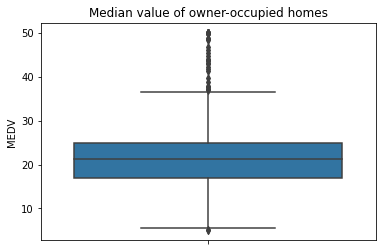

In [3]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
plt.title('Median value of owner-occupied homes')

### 4.2) Provide a  **histogram** for the Charles river variable

Text(0.5, 1.0, 'Histogram for the Charles river variable')

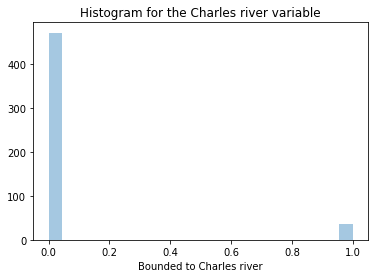

In [17]:
sns.distplot(boston_df['CHAS'],kde = False)
plt.xlabel("Bounded to Charles river")
plt.title('Histogram for the Charles river variable')

### 4.3) Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [5]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE_GROUP variable')

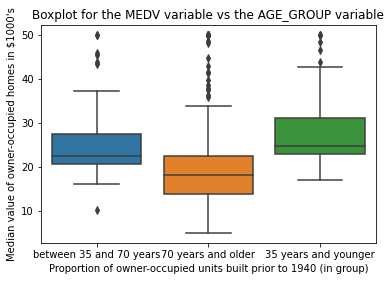

In [6]:
ax = sns.boxplot(x = 'AGE_GROUP', y = 'MEDV', data = boston_df)
plt.xlabel('Proportion of owner-occupied units built prior to 1940 (in group)')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.title('Boxplot for the MEDV variable vs the AGE_GROUP variable')

### 4.4) Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Scatter plot between NOX vs INDUS variables')

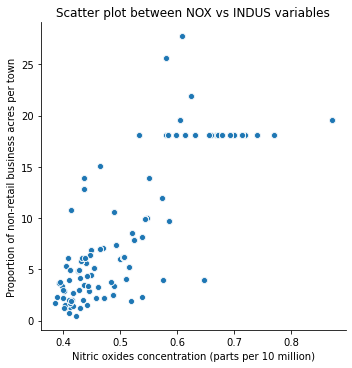

In [7]:
sns.relplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Scatter plot between NOX vs INDUS variables')

### 4.5) Create a **histogram** for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

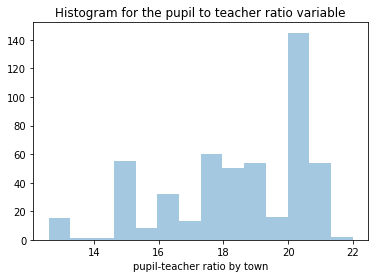

In [8]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.xlabel('pupil-teacher ratio by town')
plt.title('Histogram for the pupil to teacher ratio variable')

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

### 5.1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   **Null hypothesis H0:** µ1 = µ2 (There is no difference in median value of houses based on Charles river.)
*   **Alternate hypothesis Ha:** µ1 ≠ µ2 (There is a difference in median value of houses based on Charles river.)

Use Levene's test to check if there is no difference in variances.

In [9]:
# Null hypothesis H0 : equality of variance
# Alternate hypothesis Ha : inequality of variance
levene_result = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
levene_result

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since p-value is less than alpha value 0.05, we reject the null hypothesis, assuming inequality of variance.

In [10]:
# T-test
t_result = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
t_result

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in mean value of houses based on Charles river.

### 5.2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   **Null hypothesis H0:** µ1 = µ2 = µ3(The three population means are equal.)
*   **Alternate hypothesis Ha:** At least one of the means differ.

Test for equality of variance

In [11]:
# Null hypothesis H0 : equality of variance
# Alternate hypothesis Ha : inequality of variance
levene_result = scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], center='mean')
levene_result

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since p-value is greater than alpha value 0.05, we can assume equality of variance.

In [12]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [13]:
# one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 5.3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*   **Null hypothesis H0:** Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town.
*   **Alternate hypothesis Ha:** Nitric oxide concentrations is correlated with proportion of non-retail business acres per town.

In [14]:
pearson_result = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
pearson_result

(0.7636514469209149, 7.913361061240043e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. Therefore, we can conclude that there is a relationship** between Nitric oxide concentrations and proportion of non-retail business acres per town

### 5.4) What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*   **Null hypothesis H0:** An additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes.
*   **Alternate hypothesis Ha:** An additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes.

In [15]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [16]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.21e-08
Time:                        09:09:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis. Therefore, we can conclude that An additional weighted distance to the five Boston employment centres **has an effect** on the median value of owner occupied homes. The coefficient 1.0916